In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653258270.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]

i_data.head(10)

,X,Y
0,22.792393,19.672351
1,92.557766,-7.202176
2,-76.130610,-60.435631
3,-77.028504,58.995751
4,68.200161,69.813692
5,91.044410,47.800217
6,-46.727576,-40.440371
7,-23.507190,-43.579528
8,66.885501,-18.845177
9,78.649258,80.011512


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]

j_data.head(10)

,X,Y
0,47.852513,12.439654
1,-89.264281,-23.893653
2,-39.429312,-75.138571
3,56.576003,9.062769
4,-68.114533,-91.650700
5,-96.280030,-32.113074
6,19.928771,81.992421
7,59.081145,32.781637
8,22.409048,26.805760
9,57.230290,27.768389


Text(0.5, 1.0, 'Customer and Facility Locations')

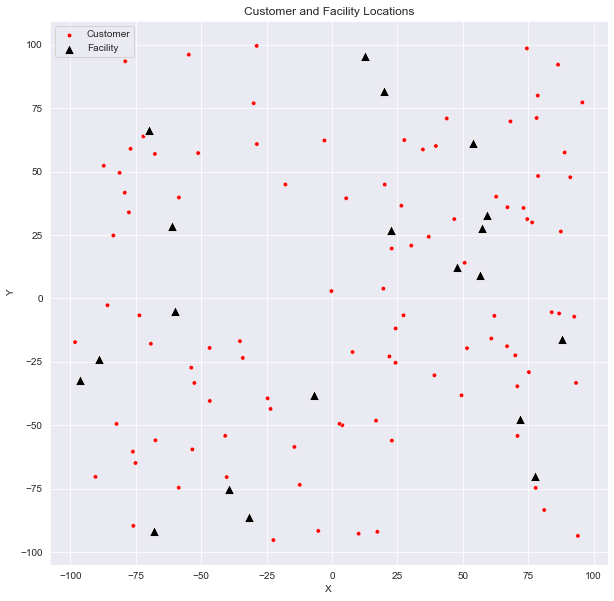

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[ 26.08297367, 120.22767985, 113.40481232, ...,  51.91470843, 103.99535125, 119.26468744],
       [ 48.82992012, 182.58658813, 148.44508202, ...,  78.41443307, 178.54243016, 147.40908171],
       [143.81454006,  38.83052191,  39.53684041, ..., 178.11313839, 127.09687664,  51.37015269],
       ...,
       [ 30.36354322, 167.37045686, 153.88641627, ...,  28.28092926, 140.44539878, 157.27266988],
       [ 48.12149359, 149.00674132, 153.04503075, ...,  19.476056  , 105.0754966 , 159.62856885],
       [127.33985073,  58.99865524, 115.59457153, ..., 134.49080002,  33.43950803, 128.76899323]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
